<a href="https://colab.research.google.com/github/RaulPreciado/IS_4487/blob/main/Module4_Script_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 4 Script

## Objectives

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [10]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [11]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/megatelco (1).csv')

Mounted at /content/gdrive


In [12]:
#look at the top rows
df.head(10) 

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,zero,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,one,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,one,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,one,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
9,one,37852,0,74,264893,857,0.0,2,low,low,yes,LEAVE,12612


## Finding which attributes have empty/null values

In [13]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      5000 non-null   object 
 1   income                       5000 non-null   int64  
 2   overage                      5000 non-null   int64  
 3   leftover                     5000 non-null   int64  
 4   house                        5000 non-null   int64  
 5   handset_price                5000 non-null   int64  
 6   over_15mins_calls_per_month  4997 non-null   float64
 7   average_call_duration        5000 non-null   int64  
 8   reported_satisfaction        5000 non-null   object 
 9   reported_usage_level         5000 non-null   object 
 10  considering_change_of_plan   5000 non-null   object 
 11  leave                        5000 non-null   object 
 12  id                           5000 non-null   int64  
dtypes: float64(1), int

In [14]:
#describe the data before cleaning it
df.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,4997.000000,5000.000000,5000.000000
mean,79912.948400,85.119200,24.243600,493656.326600,7.876236e+02,7.744647,5.958800,10036.639400
std,41703.042384,85.655622,26.847496,254287.193865,2.828291e+04,8.806070,4.390417,5813.620304
min,-28811.000000,0.000000,0.000000,-796132.000000,1.300000e+02,0.000000,1.000000,2.000000
25%,41592.500000,0.000000,0.000000,260586.500000,2.190000e+02,1.000000,2.000000,4950.500000
50%,75041.500000,59.000000,15.000000,451865.500000,3.220000e+02,4.000000,5.000000,10126.000000
75%,115475.000000,177.000000,42.000000,701608.750000,5.280000e+02,14.000000,9.000000,15085.250000
max,159938.000000,335.000000,89.000000,1000000.000000,2.000234e+06,29.000000,15.000000,20000.000000


In [15]:
df2 = df[df["income"] >= 0]  

df2["Income_Level"] = df["income"]
df2["Income_Level"] = np.where(df2["Income_Level"].between(0,25000), 1, df2['Income_Level'])
df2["Income_Level"] = np.where(df2["Income_Level"].between(25001,50000), 2, df2['Income_Level'])
df2["Income_Level"] = np.where(df2["Income_Level"].between(50001,75000), 3, df2['Income_Level'])
df2["Income_Level"] = np.where(df2["Income_Level"] > 75001, 4, df2["Income_Level"])

df2["Satisfaction_Level"] = df2["reported_satisfaction"].astype("category")

<ipython-input-15-2e36285f33a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Income_Level"] = df["income"]
<ipython-input-15-2e36285f33a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Income_Level"] = np.where(df2["Income_Level"].between(0,25000), 1, df2['Income_Level'])
<ipython-input-15-2e36285f33a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<AxesSubplot:xlabel='reported_satisfaction'>

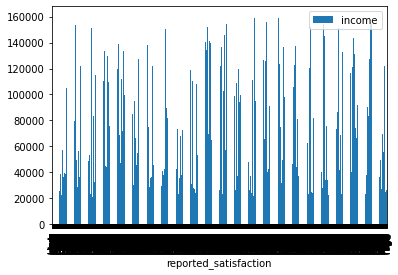

In [16]:
df2.plot(y="income", x="reported_satisfaction", kind="bar")

<AxesSubplot:ylabel='leave'>

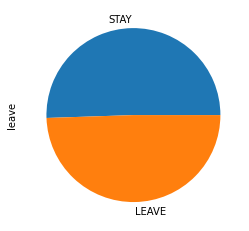

In [17]:
s = df2["leave"].value_counts()
s.plot(kind="pie")

<AxesSubplot:>

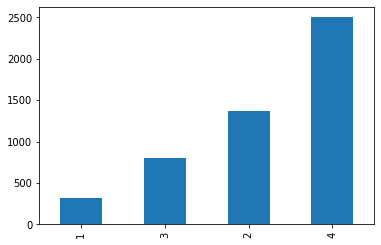

In [18]:
df2["Income_Level"].value_counts().sort_values().plot(kind='bar')

<AxesSubplot:>

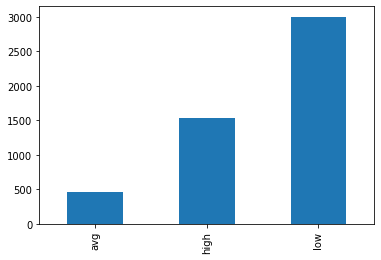

In [19]:
df2["Satisfaction_Level"].value_counts().sort_values().plot(kind='bar')

## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


## Nulls to be corrected

##Plot the total number of orders and revenue by state

# Standardize attributes

- Convert the "college" and "considering_change_of_plan" attributes to 0 or 1
- Convert non-numeric attributes to numeric scale of 1-3


# Convert attributes to factors

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.